In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
company_data = pd.read_csv("D:/MIT/Semester-6/Machine Learning Lab/Datasets/Company_Data.csv")
tvmarketing = pd.read_csv("D:/MIT/Semester-6/Machine Learning Lab/Datasets/tvmarketing.csv")

In [6]:
tvmarketing.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

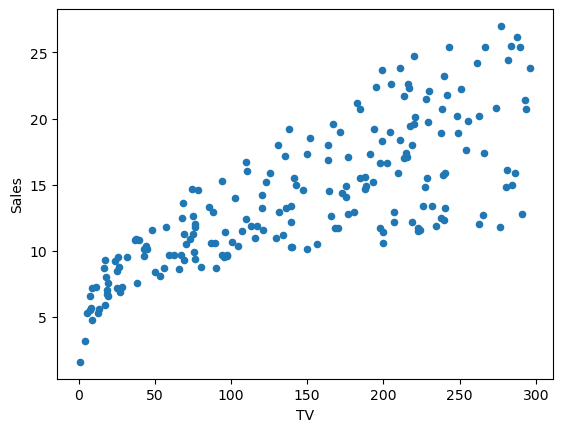

In [7]:
tvmarketing.plot(x="TV", y="Sales", kind="scatter")

In [8]:
#linear regression
#y=c + m1x1+ m2x2+....mnxn
#y(sales) = c + w1*TV

In [9]:
X = tvmarketing["TV"]
y = tvmarketing["Sales"]#output

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2,
random_state=0)

In [11]:
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)
#we need to resharpe the train as we need to pass 2d to model

(160,) (160,)
(40,) (40,)


In [12]:
lr = LinearRegression()

In [13]:
Xtrain = np.expand_dims(Xtrain, 1)
Xtest = np.expand_dims(Xtest,1)

In [14]:
print(Xtrain.shape)
print(Xtest.shape)

(160, 1)
(40, 1)


In [15]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [16]:
print(lr.intercept_)
print(lr.coef_)

7.292493773559357
[0.04600779]


In [17]:
lr.score(Xtrain, ytrain)

0.5884742462828709

In [18]:
lr.score(Xtest, ytest)

0.6763151577939723

In [19]:
y_pred = lr.predict(Xtest)

<module 'matplotlib.pyplot' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

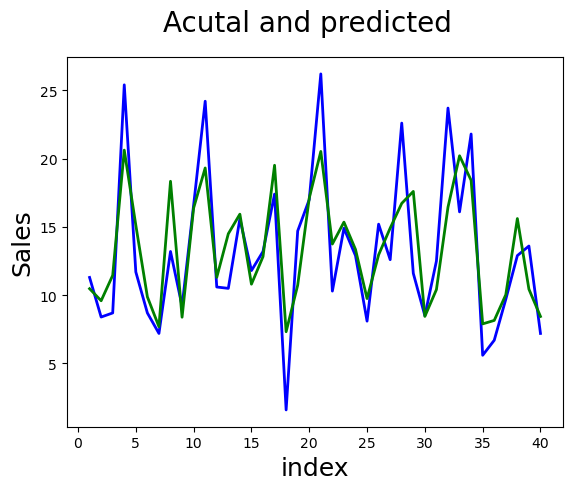

In [20]:
c = [i for i in range(1,41,1)]
fig = plt.figure()
plt.plot(c, ytest, color="blue", linewidth = 2, linestyle="-")
plt.plot(c, y_pred, color="green", linewidth = 2, linestyle="-")
fig.suptitle("Acutal and predicted", fontsize=20)
plt.xlabel(("index"), fontsize= 18)
plt.ylabel(("Sales"), fontsize= 18)
plt

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred)
print(mse) #smaller the value better the accuracy

10.186181934530214


In [22]:
r2s = r2_score(ytest, y_pred)
print(r2s)

0.6763151577939723


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
4
Xtest = scaler.fit_transform(Xtest)
lr.fit(Xtrain, ytrain)
#y_pred = lr.predict(Xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest,y_pred))

10.186181934530214
0.6763151577939723


In [24]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor(hidden_layer_sizes=(10,),activation='identity',
solver='sgd',verbose=True, max_iter=60)
mlp_r

MLPRegressor(activation='identity', hidden_layer_sizes=(10,), max_iter=60,
             solver='sgd', verbose=True)

In [25]:
mlp_r.fit(Xtrain, ytrain)

Iteration 1, loss = 108.84411541
Iteration 2, loss = 107.24151645
Iteration 3, loss = 104.99892894
Iteration 4, loss = 102.21614759
Iteration 5, loss = 98.98017131
Iteration 6, loss = 95.36210629
Iteration 7, loss = 91.41616545
Iteration 8, loss = 87.18053291
Iteration 9, loss = 82.67977337
Iteration 10, loss = 77.92845546
Iteration 11, loss = 72.93568609
Iteration 12, loss = 67.71028215
Iteration 13, loss = 62.26630922
Iteration 14, loss = 56.62867559
Iteration 15, loss = 50.83837745
Iteration 16, loss = 44.95685425
Iteration 17, loss = 39.06875917
Iteration 18, loss = 33.28232598
Iteration 19, loss = 27.72649413
Iteration 20, loss = 22.54412692
Iteration 21, loss = 17.88110384
Iteration 22, loss = 13.87181889
Iteration 23, loss = 10.62260212
Iteration 24, loss = 8.19559214
Iteration 25, loss = 6.59628383
Iteration 26, loss = 5.76797595
Iteration 27, loss = 5.59538960
Iteration 28, loss = 5.91786885
Iteration 29, loss = 6.55025127
Iteration 30, loss = 7.30744862
Iteration 31, loss = 8

MLPRegressor(activation='identity', hidden_layer_sizes=(10,), max_iter=60,
             solver='sgd', verbose=True)

In [26]:
y_pred1 = mlp_r.predict(Xtest)

Text(0, 0.5, 'Sales')

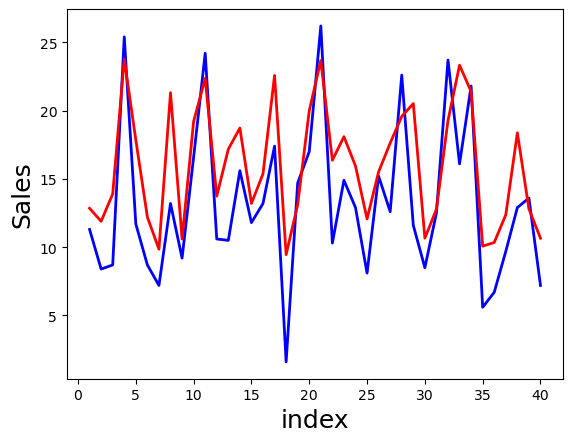

In [27]:
plt.plot(c, ytest, color="blue", linewidth = 2, linestyle="-")
plt.plot(c, y_pred1, color="red", linewidth = 2, linestyle="-")
fig.suptitle("Acutal and predicted", fontsize=20)
plt.xlabel(("index"), fontsize= 18)
plt.ylabel(("Sales"), fontsize= 18)

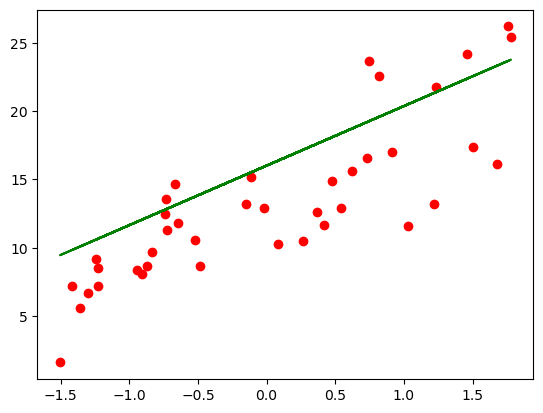

In [28]:
plt.scatter(Xtest, ytest, color = 'r')
plt.plot(Xtest, y_pred1, color = 'g')